In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
# !wget "https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg"

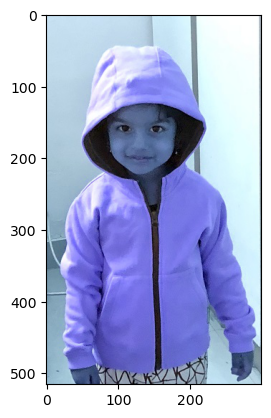

In [3]:
import cv2
img = cv2.imread('Hemanvi.jpeg')
plt.imshow(img)

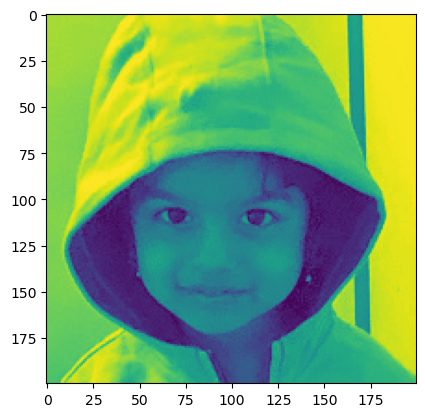

In [4]:
img = img[50:250, 40:240]
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImg)

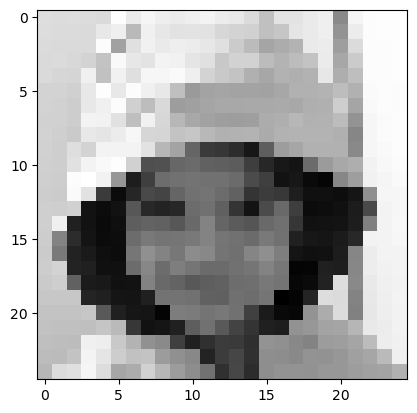

In [5]:
# lets convert the image into 25 x 25 array
resize_img = cv2.resize(grayImg, (25, 25))
plt.imshow(resize_img, cmap='gray')

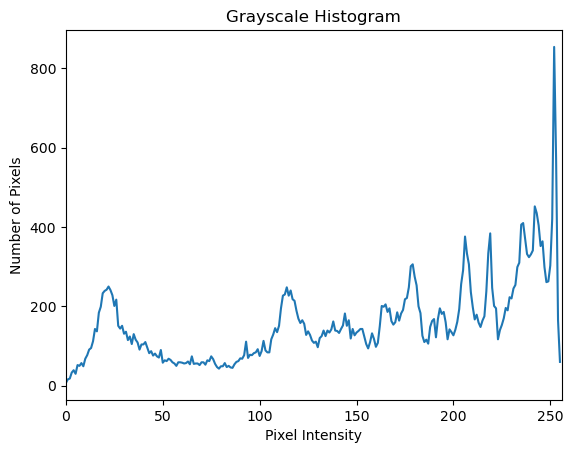

In [6]:
# Step 2: Compute the histogram
histogram = cv2.calcHist([grayImg], [0], None, [256], [0, 256])

# Step 3: Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.plot(histogram)
plt.xlim([0, 256])  # Pixel intensity range
plt.show()

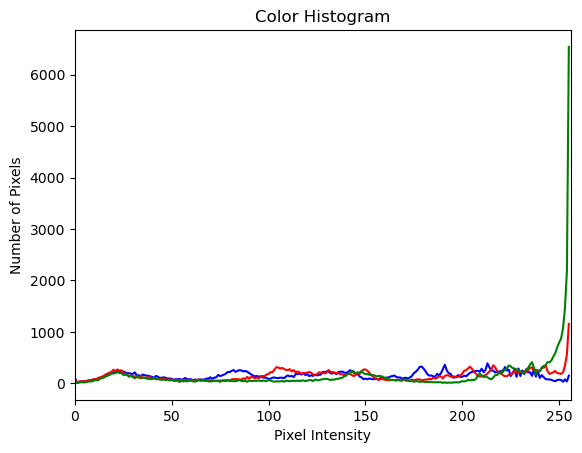

In [7]:
# histogram for colored images
img = cv2.imread('Hemanvi.jpeg')
resize_img = img[50:250, 40:240]

colors = ('b', 'r', 'g')
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
for i , col in enumerate(colors):
    histogram = cv2.calcHist([resize_img], [i], None, [256], [0, 256])

    plt.plot(histogram, color=col)
    plt.xlim([0, 256])

plt.show()

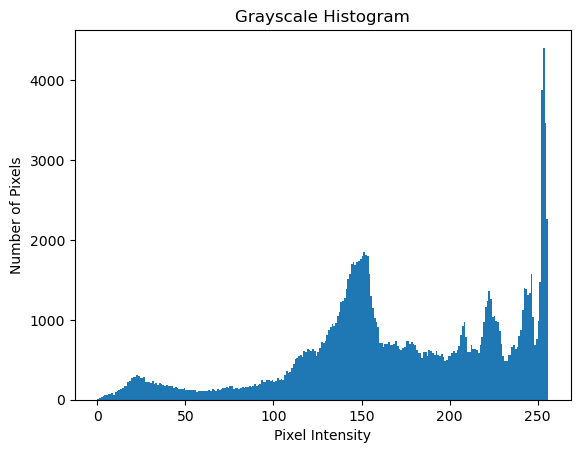

In [8]:
# histogram using numpy
image = Image.open('Hemanvi.jpeg')

# Step 2: Convert image to grayscale if needed
grayscale_image = image.convert("L")

# Step 3: Convert the image to a numpy array
image_array = np.array(grayscale_image)

# Step 4: Plot the histogram using numpy
plt.hist(image_array.ravel(), bins=256, range=[0, 256])
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.show()


## Corner and Edge Detection
To detect corners and edges in an image, you can use algorithms like Harris Corner Detection, Shi-Tomasi Corner Detection, and Canny Edge Detection. These algorithms are commonly used in image processing to highlight key features like sharp changes in intensity (edges) or points where edges meet (corners)

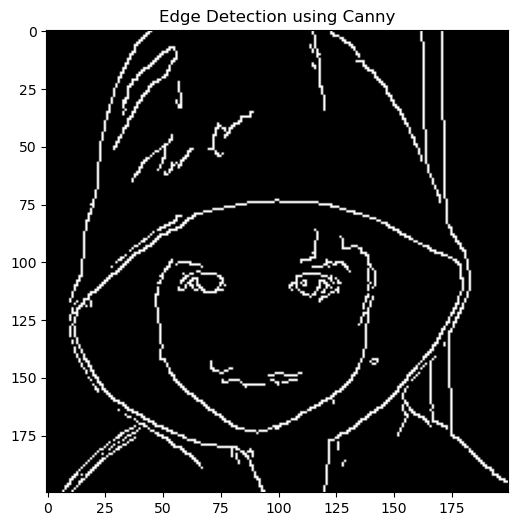

In [9]:
# Step 3: Apply Canny Edge Detector
edges = cv2.Canny(grayImg, threshold1=100, threshold2=200)

# Step 4: Display the edge detection result
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection using Canny')
plt.show()

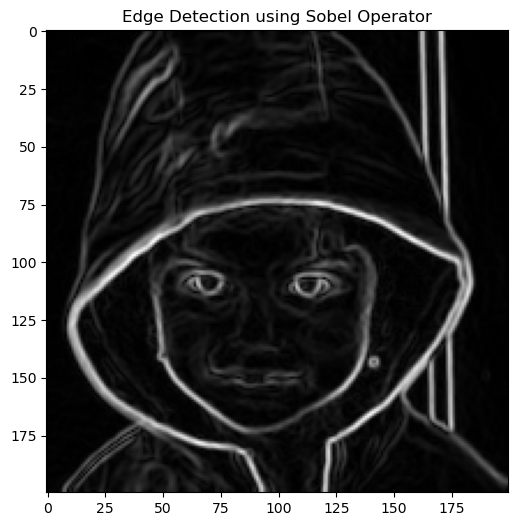

In [13]:
# Step 3: Apply Sobel Operator to detect edges
sobelx = cv2.Sobel(grayImg, cv2.CV_64F, 1, 0, ksize=5)  # Horizontal edges
sobely = cv2.Sobel(grayImg, cv2.CV_64F, 0, 1, ksize=5)  # Vertical edges

# Step 4: Combine horizontal and vertical edges
sobel_combined = cv2.magnitude(sobelx, sobely)

# Step 5: Display the result
plt.figure(figsize=(8, 6))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Edge Detection using Sobel Operator')
plt.show()

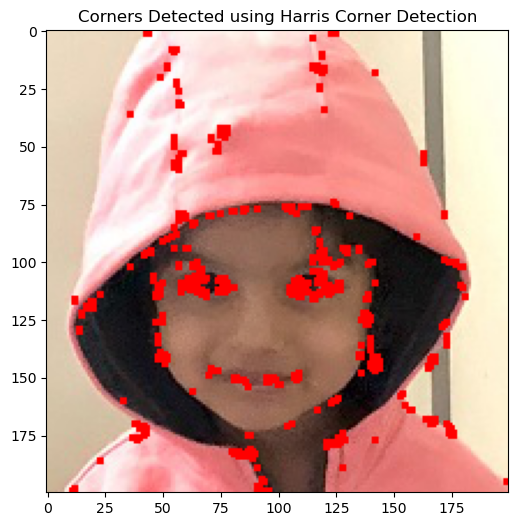

In [10]:
img = cv2.imread("Hemanvi.jpeg")
img = img[50:250, 40:240]
# Step 3: Convert to float32 data type for Harris Corner Detection
gray_float = np.float32(grayImg)

# Step 4: Apply Harris Corner Detection
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Step 5: Dilate corner points to enhance visibility
harris_corners = cv2.dilate(harris_corners, None)

# Step 6: Threshold for an optimal value and mark the corners in red
corner_mask = harris_corners > 0.001 * harris_corners.max()
img[corner_mask] = [0, 0, 255]

# Step 7: Display the corners
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected using Harris Corner Detection')
plt.show()

/tmp/ipykernel_202614/1998350336.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


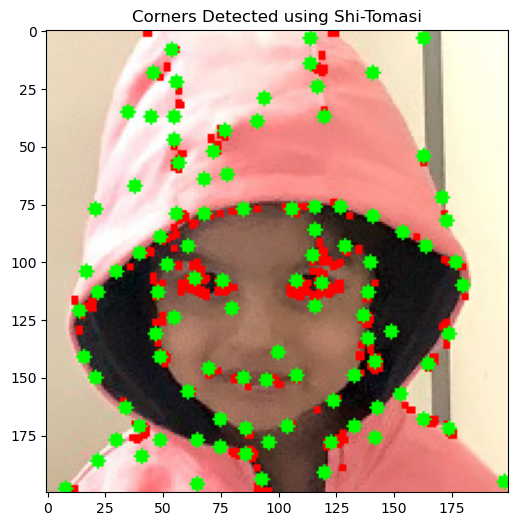

In [12]:
# Step 3: Apply Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(grayImg, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Step 4: Mark the corners on the original image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Step 5: Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected using Shi-Tomasi')
plt.show()